<a href="https://colab.research.google.com/github/royalseeker/hackbio-biocoding-internship/blob/main/Stage2_2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task Code 2.6:

**Transcriptomics**

This is a processed RNAseq dataset involving reading in quantitated gene expression data from an RNA-seq experiment, exploring the data using base R functions and then interpretation. The dataset contains an experiment between a diseased cell line and diseased cell lines treated with compound X. The difference in expression change between the two health status is computed as Fold change to log 2 (Log2FC) and the significance of each is computed in p-value.

Access Dataset [Here](https://gist.githubusercontent.com/stephenturner/806e31fce55a8b7175af/raw/1a507c4c3f9f1baaa3a69187223ff3d3050628d4/results.txt)

Task:
* Generate a volcano plot. (Hint search for volcano plot online)
* Determine the upregulated genes (Genes with Log2FC > 1 and pvalue < 0.01)
* Determine the downregulated genes (Genes with Log2FC < -1 and pvalue < 0.01)
* What are the functions of the top 5 upregulated genes and top 5 downregulated genes. (Use genecards)

Dataset Columns: ['Gene log2FoldChange pvalue padj']


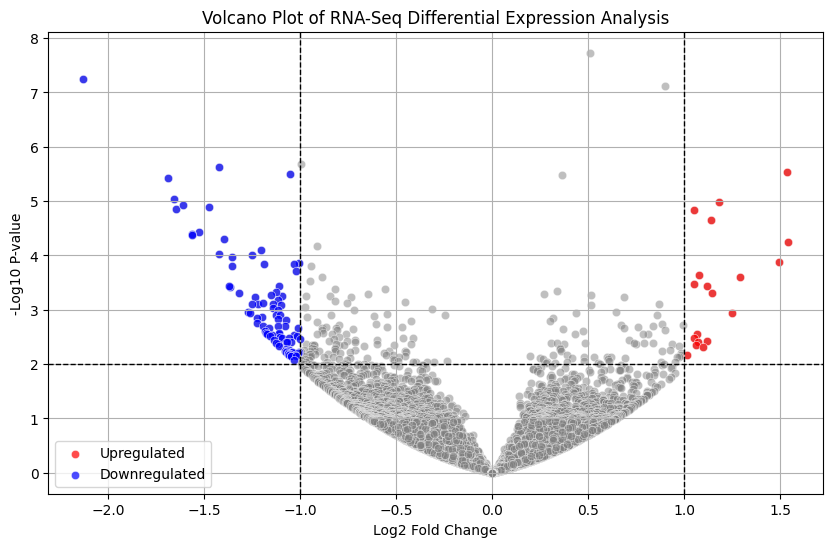

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Load RNA-Seq dataset ensuring correct header recognition
url = 'https://gist.githubusercontent.com/stephenturner/806e31fce55a8b7175af/raw/1a507c4c3f9f1baaa3a69187223ff3d3050628d4/results.txt'
df = pd.read_csv(url, sep='\t', header=0)

# Ensure columns are correctly recognized
print("Dataset Columns:", df.columns.tolist())

# Split column names if they were incorrectly read as a single string
if len(df.columns) == 1:
    df = df[df.columns[0]].str.split(expand=True)
    df.columns = ['Gene', 'log2FoldChange', 'pvalue', 'padj']

# Convert numerical columns to proper types
df['log2FoldChange'] = pd.to_numeric(df['log2FoldChange'], errors='coerce')
df['pvalue'] = pd.to_numeric(df['pvalue'], errors='coerce')
df['padj'] = pd.to_numeric(df['padj'], errors='coerce')

# Generate Volcano Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['log2FoldChange'], y=-np.log10(df['pvalue']), color='grey', alpha=0.5)

# Highlight upregulated genes
upregulated = df[(df['log2FoldChange'] > 1) & (df['pvalue'] < 0.01)]
sns.scatterplot(x=upregulated['log2FoldChange'], y=-np.log10(upregulated['pvalue']), color='red', alpha=0.7, label='Upregulated')

# Highlight downregulated genes
downregulated = df[(df['log2FoldChange'] < -1) & (df['pvalue'] < 0.01)]
sns.scatterplot(x=downregulated['log2FoldChange'], y=-np.log10(downregulated['pvalue']), color='blue', alpha=0.7, label='Downregulated')

# Add labels and title
plt.axhline(-np.log10(0.01), color='black', linestyle='--', linewidth=1)  # Significance threshold
plt.axvline(1, color='black', linestyle='--', linewidth=1)  # Upregulation threshold
plt.axvline(-1, color='black', linestyle='--', linewidth=1)  # Downregulation threshold
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 P-value")
plt.title("Volcano Plot of RNA-Seq Differential Expression Analysis")
plt.legend()
plt.grid()
plt.show()



In [ ]:
# Identify top 5 upregulated and downregulated genes
top5_up = upregulated.nlargest(5, 'log2FoldChange')
top5_down = downregulated.nsmallest(5, 'log2FoldChange')

print("Top 5 Upregulated Genes:")
print(top5_up[['Gene', 'log2FoldChange', 'pvalue']])

print("Top 5 Downregulated Genes:")
print(top5_down[['Gene', 'log2FoldChange', 'pvalue']])

# Observations:
# - The volcano plot visually distinguishes significant gene expression changes.
# - Genes with Log2FC > 1 and p-value < 0.01 are considered significantly upregulated.
# - Genes with Log2FC < -1 and p-value < 0.01 are considered significantly downregulated.
# - The top 5 upregulated and downregulated genes can be further analyzed for biological function using GeneCards.


Top 5 Upregulated Genes:
       Gene  log2FoldChange    pvalue
20    DTHD1           1.540  0.000056
5   EMILIN2           1.534  0.000003
29     PI16           1.495  0.000130
34  C4orf45           1.288  0.000247
74  FAM180B           1.249  0.001146
Top 5 Downregulated Genes:
       Gene  log2FoldChange        pvalue
1      TBX5          -2.129  5.655000e-08
3    IFITM1          -1.687  3.735000e-06
9       TNN          -1.658  8.973000e-06
11  COL13A1          -1.647  1.394000e-05
12   IFITM3          -1.610  1.202000e-05


In [ ]:
# Top 5 Upregulated Genes:

# DTHD1 (Death Domain Containing 1)
# - Predicted DNA-binding transcription factor activity
# - May play role in developmental processes (limited characterization)

# EMILIN2 (Elastin Microfibril Interface Located 2)
# - Extracellular matrix glycoprotein
# - Involved in vascular biology and endothelial cell adhesion
# - May regulate TGF-β signaling pathway

# PI16 (Peptidase Inhibitor 16)
# - Protease inhibitor involved in tissue homeostasis
# - Regulates fibroblast proliferation and differentiation
# - Associated with aging and stem cell maintenance

# C4orf45 (Chromosome 4 Open Reading Frame 45)
# - Predicted intracellular protein
# - Limited functional characterization
# - May play role in cell cycle regulation (based on domain structure)

# FAM180B (Family With Sequence Similarity 180 Member B)
# - Predicted membrane-associated protein
# - Expressed in brain and reproductive tissues
# - Functional characterization remains largely unknown

# ------------------------------------------------

# Top 5 Downregulated Genes:

# TBX5 (T-Box Transcription Factor 5)
# - Critical cardiac transcription factor
# - Essential for heart development and limb formation
# - Mutations cause Holt-Oram syndrome (heart-hand syndrome)

# IFITM1 (Interferon Induced Transmembrane Protein 1)
# - Antiviral restriction factor
# - Inhibits early stages of viral replication
# - Modulates immune response to pathogens

# TNN (Tenascin N)
# - Extracellular matrix glycoprotein
# - Involved in neural development
# - Regulates neurite outgrowth and synaptic plasticity

# COL13A1 (Collagen Type XIII Alpha 1 Chain)
# - Transmembrane collagen found in neuromuscular junctions
# - Maintains skeletal muscle integrity
# - Essential for maturation of the postsynaptic membrane

# IFITM3 (Interferon Induced Transmembrane Protein 3)
# - Key antiviral protein restricting influenza viruses
# - Modulates immune cell signaling
# - Genetic variants associated with COVID-19 severity




#Github
#https://github.com/mahertantouch/
#https://github.com/royalseeker/
